# Clasificación multiclase

Ya hemos construido nuestro primer modelo de clasificación binario. Comenzamos por una sola variable independiente, introducimos varias, y ahora haremos una extensión importante: **clasificación con más de dos categorías**. Un ejemplo de esto podría ser el aprender una función que, con las coordenadas de latitud y longitud de un punto geográfico dentro del territorio nacional, nos devuelve una de las siguientes:

- Una etiqueta $\texttt{provincia} \in \left\{\texttt{San Jose}, \texttt{Alajuela}, \texttt{Cartago}, \texttt{Heredia}, \texttt{Guanacaste}, \texttt{Puntarenas}, \texttt{Limon} \right\}$. O, en su defecto,
- Un vector $\mathbf{y}$ con siete valores que denotan la probabilidad de que el punto indicado se encuentre en una provincia dada, de modo que $\sum_{i=1}^{7} y_i = 1$.


### El dataset de los lirios

![image](img/lirios.png)

<center>Imagen tomada de <a href="https://www.datacamp.com/community/tutorials/machine-learning-in-r/">Machine Learning in R for beginners</a></center>

Para este notebook, haremos uso de uno de los datasets más famosos y antiguos de la historia de la estadística: los **datos de los lirios de Fisher**, conocido en inglés como el *Iris dataset*. Este dataset contiene muestras de mediciones de lirios, con cinco columnas: **la longitud y ancho del pétalo y del sépalo, respectivamente**, y una etiqueta que indica la especie de lirio al que corresponde, que puede ser *versicolor*, *virginica* o *setosa*. Nuestro objetivo, entonces, es aprender una de las dos funciones, de acuerdo con las descripciones que dimos arriba 

- $f\left(\texttt{l}\_\texttt{petalo}, \texttt{a}\_\texttt{petalo}, \texttt{l}\_\texttt{sepalo}, \texttt{a}\_\texttt{sepalo} \right) \mapsto \left\{\texttt{versicolor}, \texttt{virginica}, \texttt{setosa}  \right\}$. Es decir, nuestra función retorna una **etiqueta específica** sin mención a su probabilidad—sin embargo, inferimos que es más probable que las otras dos. O, en su defecto,

- $f\left(\texttt{l}\_\texttt{petalo}, \texttt{a}\_\texttt{petalo}, \texttt{l}\_\texttt{sepalo}, \texttt{a}\_\texttt{sepalo} \right) \mapsto \left[ p\left(\texttt{versicolor}\right), p\left(\texttt{virginica} \right), p\left(\texttt{setosa} \right)\right]$. Es decir, un **vector de probabilidades**, de modo que $p\left(\texttt{versicolor}\right) + p\left(\texttt{virginica} \right) + p\left(\texttt{setosa} \right) = 1$

In [1]:
# Cargamos nuestras bibliotecas importantes
import numpy as np
import matplotlib.pyplot as plt

# Carga el dataset de los lirios
l_petalo = [1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4, 1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1, 1.7, 1.9, 1.6, 1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3, 1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5, 4.9, 4, 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4, 4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4, 4.9, 4.7, 4.3, 4.4, 4.8, 5, 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4, 4.4, 4.6, 4, 3.3, 4.2, 4.2, 4.2, 4.3, 3, 4.1, 6, 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5, 5.1, 5.3, 5.5, 6.7, 6.9, 5, 5.7, 4.9, 6.7, 4.9, 5.7, 6, 4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5, 5.2, 5.4, 5.1]
a_petalo = [0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1, 0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2, 0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2, 0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5, 1.5, 1.3, 1.5, 1.3, 1.6, 1, 1.3, 1.4, 1, 1.5, 1, 1.4, 1.3, 1.4, 1.5, 1, 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7, 1.5, 1, 1.1, 1, 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2, 1.4, 1.2, 1, 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8, 2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2, 1.9, 2.1, 2, 2.4, 2.3, 1.8, 2.2, 2.3, 1.5, 2.3, 2, 2, 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6, 1.9, 2, 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9, 2.3, 2.5, 2.3, 1.9, 2, 2.3, 1.8]
l_sepalo = [5.1, 4.9, 4.7, 4.6, 5, 5.4, 4.6, 5, 4.4, 4.9, 5.4, 4.8, 4.8, 4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5, 5, 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5, 5.5, 4.9, 4.4, 5.1, 5, 4.5, 4.4, 5, 5.1, 4.8, 5.1, 4.6, 5.3, 5, 7, 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5, 5.9, 6, 6.1, 5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7, 6, 5.7, 5.5, 5.5, 5.8, 6, 5.4, 6, 6.7, 6.3, 5.6, 5.5, 5.5, 6.1, 5.8, 5, 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6, 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6, 6.9, 6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]
a_sepalo = [3.5, 3, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3, 3, 4, 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3, 3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.6, 3, 3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3, 3.8, 3.2, 3.7, 3.3, 3.2, 3.2, 3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2, 3, 2.2, 2.9, 2.9, 3.1, 3, 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3, 2.8, 3, 2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3, 3.4, 3.1, 2.3, 3, 2.5, 2.6, 3, 2.6, 2.3, 2.7, 3, 2.9, 2.9, 2.5, 2.8, 3.3, 2.7, 3, 2.9, 3, 3, 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3, 2.5, 2.8, 3.2, 3, 3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3, 2.8, 3, 2.8, 3.8, 2.8, 2.8, 2.6, 3, 3.4, 3.1, 3, 3.1, 3.1, 3.1, 2.7, 3.2, 3.3, 3, 2.5, 3, 3.4, 3]
especie = ['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica']

# Creamos una matriz de diseño con las variables independientes
datos_x = np.array((l_petalo, a_petalo, l_sepalo, a_sepalo)).transpose()

## Clasificación uno-contra-todos

La primera técnica de clasificación multiclase que veremos es la denominada **uno-contra-todos** (en inglés *one-vs-all*). Esta es una **técnica general** que puede ser aplicada a **cualquier modelo de clasificación binario** y no solo a la regresión logística. De hecho, esta técnica es de uso común en modelos que no tienen una generalización multiclase natural, como las **máquinas de soporte vectorial** (SVMs). 

La técnica es simple y consiste en entrenar **un modelo de clasificación binaria separado para cada etiqueta**. Por ejemplo, en nuestro ejemplo de las provincias, tendríamos que entrenar **siete** modelos distintos. En el caso de los lirios, entrenaremos **tres modelos distintos**, cada uno de la forma $$f\left(\texttt{l}\_\texttt{petalo}, \texttt{a}\_\texttt{petalo}, \texttt{l}\_\texttt{sepalo}, \texttt{a}\_\texttt{sepalo} \right) \mapsto [0,1]$$ de modo que, por ejemplo, el modelo de ``versicolor`` es un modelo que nos devuelve la probabilidad de que el lirio sea de especie *versicolor*, y de igual manera con ``virginica`` y ``setosa``.

Para poder hacer esto, a la hora de entrenar los tres modelos, tenemos que crear un **vector de entrenamiento distinto para cada uno**, en el que la variable dependiente está codificada de manera binaria de acuerdo a la etiqueta correspondiente. Por ejemplo, el modelo que entrenaremos para ``setosa`` tendrá un vector ``especie_setosa`` codificado de modo que ``1=setosa`` y ``0=todo-lo-que-no-es-setosa``. Lo haremos de modo similar con los otros dos.


In [2]:
# Codificamos el vector 'especie' para los tres clasificadores distintos
especie_setosa = np.array([1.0 if x=='setosa' else 0.0 for x in especie])
especie_virginica = np.array([1.0 if x=='virginica' else 0.0 for x in especie])
especie_versicolor = np.array([1.0 if x=='versicolor' else 0.0 for x in especie])

Ahora, procederemos a generar nuestros tres modelos de regresión logística. Pero antes, retomemos nuestro código de gradiente descendiente del notebook previo, con leves modificaciones. 

In [3]:
# Función sigmoide y su derivada
def sig(x):
    return 1.0 / (1.0 + np.exp(-x))

def d_sig(x):
    return sig(x) * (1.0 - sig(x))

# Función de error y su derivada
def bce(y_real, y_pred):
    return np.sum(-y_real*np.log(y_pred) - (1.0 - y_real)*np.log(1.0 - y_pred))

def d_bce(y_real, y_pred):
    return (y_pred - y_real) / (y_pred * (1.0-y_pred))

# Cálculo de gradientes
def grads(x, y_real, cur_bi, cur_b0):    
    f_val = np.dot(x, cur_bi) + cur_b0
    y_pred = sig(f_val)
    d_err = d_bce(y_real, y_pred)
    d_f_val = d_sig(f_val)
    d_bi = np.dot(d_err * d_f_val, x)
    d_b0 = np.sum(d_err * d_f_val)
    return (d_bi, d_b0)

# Función de optimización con gradiente descendiente
def gd(x, y, lr=0.001, num_iter=1000):
    M = x.shape[1]
    bi = np.random.randn(M)
    [b0] = np.random.randn(1)
    errs = []
    
    for ix in range(num_iter):
        pred = sig(np.dot(x, bi) + b0)
        err = bce(y, pred)
        (d_bi, d_b0) = grads(x, y, bi, b0)
        bi = bi - lr * d_bi
        b0 = b0 - lr * d_b0
        errs.append(err)
        
    return (errs,bi,b0)

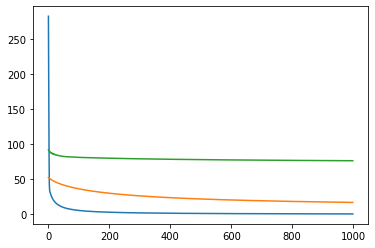

In [4]:
# Entrenemos los tres modelos
(errs_setosa, bi_setosa, b0_setosa) = gd(datos_x, especie_setosa)
(errs_virginica, bi_virginica, b0_virginica) = gd(datos_x, especie_virginica)
(errs_versicolor, bi_versicolor, b0_versicolor) = gd(datos_x, especie_versicolor)

# Graficamos las tres curvas de error a través de las iteraciones
plt.plot(errs_setosa)
plt.plot(errs_virginica)
plt.plot(errs_versicolor)

# Coloquemos los parámetros de cada modelo en tuplas (para facilitar el código más abajo)
params_setosa = (bi_setosa, b0_setosa)
params_virginica = (bi_virginica, b0_virginica)
params_versicolor = (bi_versicolor, b0_versicolor)

# Coloquemos todos los parámetros en una lista de tuplas
params_all = [params_setosa, params_virginica, params_versicolor]

### Combinando todos en uno
Ahora que tenemos los tres modelos, ¿cómo los unimos para producir nuestra función de predicción multiclase? El procedimiento es simple. Dados los valores ``l_petalo``, ``a_petalo``, ``l_sepalo``, ``a_sepalo``, haremos lo siguiente:

1. Ejecutamos cada uno de los tres modelos por separado, obteniendo tres valores $p\left(\texttt{versicolor} \right)$, $p\left(\texttt{setosa} \right)$ y $p\left(\texttt{virginica} \right)$

2. Encontramos el valor más alto de los tres y retornamos la etiqueta que le corresponde.

Eso es todo. Hagámoslo en código.

In [5]:
# Función de predicción (probabilidad) para un clasificador por separado
def prob_uno(params, l_petalo, a_petalo, l_sepalo, a_sepalo):
    
    # saquemos los parámetros
    (bi, b0) = params
    
    # construyamos un vector de valores para predecir
    vec = np.array([l_petalo, a_petalo, l_sepalo, a_sepalo])
    
    return sig(np.dot(bi, vec) + b0)

# Función de predicción (etiqueta) para los tres clasificadores juntos
def predict(params, l_petalo, a_petalo, l_sepalo, a_sepalo):
    
    # saquemos los conjuntos de parámetros
    [params_setosa, params_virginica, params_versicolor] = params
    
    # evaluamos las tres funciones por separado
    prob_setosa = prob_uno(params_setosa, l_petalo, a_petalo, l_sepalo, a_sepalo)
    prob_virginica = prob_uno(params_virginica, l_petalo, a_petalo, l_sepalo, a_sepalo)
    prob_versicolor = prob_uno(params_versicolor, l_petalo, a_petalo, l_sepalo, a_sepalo)
    
    # encontremos la que tiene la mayor probabilidad
    which_max = np.argmax([prob_setosa, prob_virginica, prob_versicolor])
    
    # y retornamos la etiqueta correspondiente
    labels = ["setosa", "virginica", "versicolor"]    
    return labels[which_max]

In [6]:
# Probemos nuestro esquema contra el mismo dataset
pred = []
puntos = 0
for i in range(len(especie)):
    px = predict(params_all, l_petalo[i], a_petalo[i], l_sepalo[i], a_sepalo[i])
    pred.append(px)
    
    if (px == especie[i]):
        puntos += 1

print(puntos, '/', len(especie), "valores correctos")

145 / 150 valores correctos


### ¿Qué hay de malo con uno-contra-todos? 

A pesar de ser un método popular, generalmente efectivo y fácil de implementar, uno-contra-todos tiene varias desventajas:

1. El entrenar varios modelos implica correr **varias optimizaciones separadas**. Esto puede convertirse en un **problema de desempeño** si el número de etiquetas y el tamaño del dataset son ambos grandes. 

2. Las probabilidades de los distintos modelos pueden no encontrarse en la misma escala.

3. Las decisiones de clasificación pueden tornarse arbitrarias en algunos casos. Por ejemplo, si los tres clasificadores producen una probabilidad de ``1.0`` o de ``0.0``, ¿a quién se le asigna la clasificación?

4. Dado que las probabilidades de los distintos modelos son independientes, no hay una manera natural de combinarlas en un vector.


## Clasificación Softmax

Ahora que hemos entendido las desventajas del método uno-contra-todos, aprenderemos sobre una **generalización del modelo de regresión logística** que nos permite hacer clasificación multiclase sin caer en las limitaciones mencionadas arriba. Decimos que es una generalización dado que la **regresión logística es un caso específico** de la clasificación softmax en la que $K=2$, donde $K$ es el número de clases.

Esto requiere varios cambios bastante simples: 1. El modo en que codificamos los datos, 2. Las funciones de activación y regresión que utilizamos, y 3. La función de error que optimizamos. 

### Preparando los datos

Lo primero que debemos hacer es codificar nuestros datos de salida utilizando *one-hot encoding*. Es decir, vamos a generar para cada fila del dataset un vector de $K$ elementos donde el valor verdadero tiene ``1`` y el resto ``0``, teniendo al final una matriz de $K \times N$. Si decidimos que la posición ``0`` se la asignamos a ``setosa``, la ``1`` a ``versicolor`` y la ``2`` a ``virginica``, tendríamos

- Las filas asignadas a ``setosa`` con el valor ``[1, 0, 0]``, 
- Las filas asignadas a ``versicolor`` con el valor ``[0, 1, 0]``, 
- Las filas asignadas a ``virginica`` con el valor ``[0, 0, 1]``.

Esto no es difícil de hacer: podemos simplemente "apilar" los vectores codificados que construimos arriba para hacer los tres clasificadores distintos, poniéndolos juntos en una matriz. 

In [8]:
# Creamos la matriz de salida.
datos_y = np.array((especie_setosa, especie_versicolor, especie_virginica)).transpose()

# datos_y

### La activación softmax

El segundo cambio tampoco es difícil: crearemos una función de activación para múltiples clases, llamada **función softmax** $$\mathrm{softmax}\left(\mathbf{x}\right) = \frac{e^{-\mathbf{x}}}{\sum_{i=1}^{K} e^{-x_i}}.$$
Esta función toma un vector $\mathbf{x}$ y retorna un vector en el que cada valor es un número positivo y la suma de todos ellos da $1$. Su derivada, al igual que la función sigmoide, es: $$\mathrm{softmax}'\left(\mathbf{x}\right) = \mathrm{softmax} \left(\mathbf{x} \right) \left(1 - \mathrm{softmax}\left(\mathbf{x} \right)\right)$$

Ahora bien, aquí **tenemos un problema**: las funciones $\mathrm{softmax}$ y su derivada **esperan de entrada un vector**, pero nuestra función de regresión **devuelve un escalar**. Recordemos que hasta ahora la función es $$f\left(\mathbf{x} \right) = \boldsymbol{\beta_i}^{T} \mathbf{x} + \beta_0$$ donde $\mathbf{x}$ y $\boldsymbol{\alpha}$ son vectores de $M=4$ valores (**las 4 columnas de entrada en nuestro dataset de lirios**). Necesitamos cambiarla para que la salida de dicha función sea un vector de $K=3$ valores (**las tres categorías de salida**) para pasarle a $\mathrm{softmax}$.

Para arreglar este problema, cambiaremos $\boldsymbol{\beta_i}$ y $\beta_0$  de la siguiente manera:

- El vector $\boldsymbol{\beta_i}$ de $M=4$ valores pasará a ser una matriz $\mathbf{A}$ de dimensiones $M \times K$

### La activación softmax

El segundo cambio tampoco es difícil: crearemos una función de activación para múltiples clases, llamada **función softmax** $$\mathrm{softmax}\left(\mathbf{x}\right) = \frac{e^{-\mathbf{x}}}{\sum_{i=1}^{K} e^{-x_i}}.$$
Esta función toma un vector $\mathbf{x}$ y retorna un vector en el que cada valor es un número positivo y la suma de todos ellos da $1$. Su derivada, al igual que la función sigmoide, es: $$\mathrm{softmax}'\left(\mathbf{x}\right) = \mathrm{softmax} \left(\mathbf{x} \right) \left(1 - \mathrm{softmax}\left(\mathbf{x} \right)\right)$$

In [9]:
# La función softmax y su derivada
def softmax(x):
    
    # calculamos el exponente de todos los valores
    ex = np.exp(-x.T)
    
    # sumamos los exponentes para cada fila del dataset, resultando en N valores totales    
    suma = np.sum(ex, axis=0)    
    return  (ex / suma).T

def d_softmax(x):
    sx = softmax(x)
    return sx * (1.0 - sx)

Ahora bien, aquí **tenemos un problema**: las funciones $\mathrm{softmax}$ y su derivada **esperan de entrada un vector**, pero nuestra función de regresión **devuelve un escalar**. Recordemos que hasta ahora la función es $$f\left(\mathbf{x} \right) = \boldsymbol{\beta_i}^{T} \mathbf{x} + \beta_0$$ donde $\mathbf{x}$ y $\boldsymbol{\beta_i}$ son vectores de $M=4$ valores (**las 4 columnas de entrada en nuestro dataset de lirios**). Necesitamos cambiarla para que la salida de dicha función sea un vector de $K=3$ valores (**las tres categorías de salida**) para pasarle a $\mathrm{softmax}$.

Para arreglar este problema, cambiaremos $\boldsymbol{\beta_i}$ y $\beta_0$  de la siguiente manera:

- El vector $\boldsymbol{\beta_i}$ de $M=4$ valores pasará a ser una matriz $\mathbf{A}$ de dimensiones $M \times K$ = $4 \times 3$.

- El escalar $\beta$ pasará a ser un vector $\boldsymbol{\beta}$ de $K=3$ valores. 

Lo cual resulta en nuestra función de regresión $$f\left(\mathbf{x} \right) = \mathbf{\beta_i} \mathbf{x} + \beta_0$$

### La entropía cruzada multiclase

Nuestro último cambio se centra en la función de error que queremos optimizar. Esta también es una **generalización de la entropía cruzada** que utilizamos para la clasificación binaria y busca medir el error entre un vector verdad $\mathbf{y}$ y una predicción $\mathbf{\hat{y}}$: $$\mathrm{mce}\left(\mathbf{y} , \mathbf{\hat{y}}\right) = -\sum_{j=1}^{K} y_j \mathrm{log}\left(\hat{y}_j \right)$$ siendo su derivada $$ \frac{\partial \mathrm{mce}\left(\mathbf{y}, \mathbf{\hat{y}} \right)}{\partial \mathbf{\hat{y}}} =  \frac{\mathbf{y}}{\mathbf{\hat{y}}} - \frac{1-\mathbf{y}}{1-\mathbf{\hat{y}}}$$

In [10]:
# La entropía cruzada multiclase y su derivada
def mce(y_real, y_pred):
    
    # sumamos un número pequeño (1.0e-6, para evitar errores numéricos p.ej. al calcular log(0))
    return np.sum(-(y_real * np.log(y_pred + 1.0e-6)))

def d_mce(y_real, y_pred):
    
    # sumamos un número pequeño (1.0e-6, para evitar errores numéricos p.ej. división sobre cero)
    y_pred = y_pred + 1.0e-6
    return (y_real/y_pred) - (1-y_real)/(1-y_pred)

¡Ya tenemos todo listo para armar nuestro gradiente descendiente de clasificación softmax!

In [11]:
def grads_softmax(x, y_real, y_pred, cur_bi, cur_b0):
    
    f_val = np.dot(x, cur_bi) + cur_b0
    y_pred = softmax(f_val)
    d_err = d_mce(y_real, y_pred)
    d_f_val = d_softmax(f_val)
    d_bi = np.dot(x.transpose(), d_err * d_f_val)
    d_b0 = np.sum(d_err * d_f_val, axis=0)
    
    return (d_bi, d_b0)

def gd_softmax(x, y, lr=0.0001, num_iter=5000):
    
    # obtenemos el número de columnas independientes en el dataset
    M = x.shape[1]
    
    # obtenemos el número de categorías de salida
    K = y.shape[1]
    
    # generamos alpha al azar como matriz MxK
    bi = np.random.randn(M,K)
    
    # generamos beta al azar como vector K
    b0 = np.random.randn(K)
    errs = []
    
    for ix in range(num_iter):
        pred = softmax(np.dot(x, bi) + b0)
        err = mce(y, pred)
        (d_bi, d_b0) = grads_softmax(x, y, pred, bi, b0)
        bi = bi - lr * d_bi
        b0 = b0 - lr * d_b0
        errs.append(err)
        
    return (errs,bi,b0)

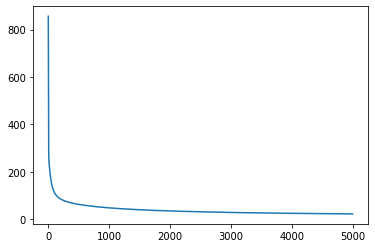

In [12]:
# Hacemos nuestra optimización y obtenemos los parámetros resultantes
(errs_softmax, bi_softmax, b0_softmax) = gd_softmax(datos_x, datos_y,num_iter=5000)
plt.plot(errs_softmax)

# Ponemos todos los parámetros juntos en una tupla
params_softmax = (bi_softmax, b0_softmax)

In [13]:
def prob_softmax(params, l_petalo, a_petalo, l_sepalo, a_sepalo):

    # sacamos los parámetros
    (alpha, beta) = params
    
    # construímos un vector de valores para predecir
    vec = np.array([l_petalo, a_petalo, l_sepalo, a_sepalo])
    
    return softmax(np.dot(vec, alpha) + beta)

def predict_softmax(params, l_petalo, a_petalo, l_sepalo, a_sepalo):
    
    vec = prob_softmax(params, l_petalo, a_petalo, l_sepalo, a_sepalo)
    
    # encontremos la que tiene la mayor probabilidad
    which_max = np.argmax(vec)
    
    # y retornamos la etiqueta correspondiente
    labels = ["setosa", "versicolor", "virginica"]    
    return labels[which_max]    

In [14]:
# Probemos nuestro esquema contra el mismo dataset
pred = []
puntos = 0
for i in range(len(especie)):
    px = predict_softmax(params_softmax, l_petalo[i], a_petalo[i], l_sepalo[i], a_sepalo[i])    
    pred.append(px)
    
    if (px == especie[i]):
        puntos += 1

print(puntos, '/', len(especie), "valores correctos")

147 / 150 valores correctos


In [21]:
# Para el primer elemento del dataset obtenemos el arreglo de probabilidades.
probs = prob_softmax(params_softmax, l_petalo[1], a_petalo[1], l_sepalo[1], a_sepalo[1])
print(probs)

# la suma de las probabilidades debe ser 1 (esto es lo que hace softmax!)
print(np.sum(probs))

[9.64412923e-01 3.55866630e-02 4.13813865e-07]
1.0


In [22]:
clase = predict_softmax(params_softmax, l_petalo[1], a_petalo[1], l_sepalo[1], a_sepalo[1])
print(clase)

setosa
